## Spotify Most Streamed Songs Project Using ML

## Problem Statement
This dataset contains comprehensive information on some of the most streamed songs on Spotify, enriched with additional insights from other popular streaming platforms like Apple Music, Deezer, and Shazam. It is ideal for music analysts, data scientists, and machine learning enthusiasts who are interested in exploring trends and characteristics of popular music tracks.

# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df=pd.read_csv("Spotify Most Streamed Songs.csv")

Here We have imported the dataset using pd.read_csv and set the option to display all the columns present in the dataset. The dataset contains the details of Spotify Most Streamed Song data.

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


With the help of head we can see the top 5 song history.

In [4]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,E,Minor,61,32,67,15,0,11,5,https://i.scdn.co/image/ab67616d0000b273992a1f...


With the help of tail we can see the bottom 5 song details.

**Attribute Information:**

Here is the meaning of each column in the dataset:
1. track_name: Name of the song.
2. artist(s)_name: Name of the artist(s) performing the song.
3. artist_count: Number of artists contributing to the song.
4. released_year, released_month, released_day: Release date details.
5. in_spotify_playlists: Number of Spotify playlists the song is featured in.
6. in_spotify_charts: Rank of the song on Spotify charts.
7. streams: Total number of streams on Spotify.
8. in_apple_playlists, in_apple_charts: Presence in Apple Music playlists and charts.
9. in_deezer_playlists, in_deezer_charts: Presence in Deezer playlists and charts.
10.in_shazam_charts: Rank on Shazam charts.
11. bpm: Beats per minute, representing the tempo of the song.
12. key: Key of the song.
13. mode: Indicates whether the song is in a major or minor mode.
14. danceability_%: Suitability of the song for dancing.
15. valence_%: Positivity of the song’s musical content.
16. valence_%: Positivity of the song’s musical content.
17. acousticness_%: Acoustic sound presence in the song.
18. instrumentalness_%: Proportion of instrumental content in the track.
19. liveness_%: Presence of live performance elements.
20. speechiness_%: Amount of spoken words in the song.
21. cover_url: Here we can see the url of the song.

## Exploratory Data Analysis(EDA)

In [5]:
df.shape

(953, 25)

This Dataset contain 953 rows and 25 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

To get good overview of the dataset

In [7]:
 # Checking null values
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

We can clearly see that column in_shazam_charts have 50 missing value and column key have 95 missing value, which means we can replace that missing value by mode beacuse of both the column have categorical data.

<Axes: >

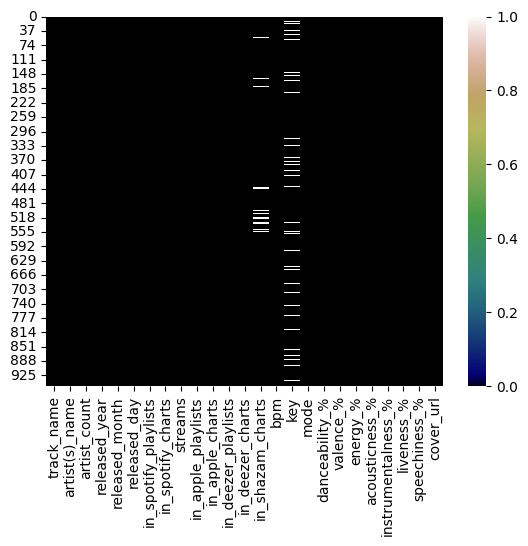

In [8]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="gist_earth")

We can clearly observe the white lines in the heatmap which indiacte the missing values in dataset

# Treating null values

In [9]:
mode_value = df['in_shazam_charts'].mode()[0]

# Fill missing values with the mode
df['in_shazam_charts'].fillna(mode_value,inplace=True)

# Verify the changes
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


In [10]:
# Calculate the mode
mode_value = df['key'].mode()[0]

# Fill missing values with the mode
df['key'].fillna(mode_value, inplace=True)

# Verify the changes
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


Column in_shazam_charts and column key replace both column missing value with mode beacuse of both the column have missing value grether than 3% and less than 50%.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

<Axes: >

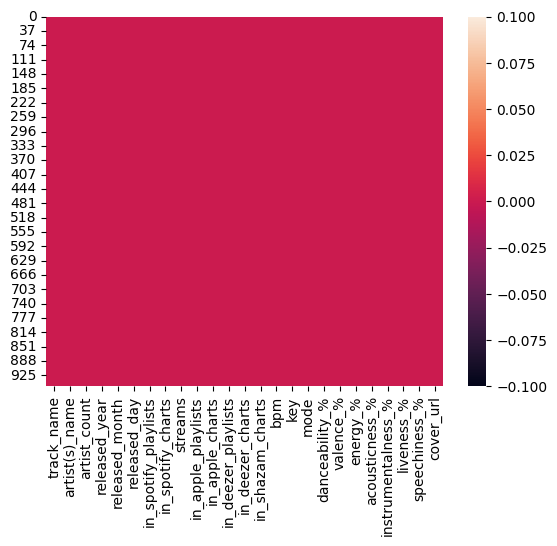

In [12]:
sns.heatmap(df.isnull())

Now we can see missing value replace with mode

In [13]:
# Separting numerical columns
numcol=df.select_dtypes(include=np.number).columns

In [14]:
numcol

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')

# seperating numerical and categorical columns in dataset

In [15]:
numcol=[]
catcol=[]
for i in df.columns:
    if df[i].dtypes=='object':     
        catcol.append(i)
    else:
        numcol.append(i)

In [16]:
numcol

['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

We can see how many numerical column present in the data

In [17]:
catcol

['track_name',
 'artist(s)_name',
 'streams',
 'in_deezer_playlists',
 'in_shazam_charts',
 'key',
 'mode',
 'cover_url']

We can see how many categorical column present in the data.

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
numeric_data = encoder.fit_transform(catcol)

In [20]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object

# Description of Dataset

In [21]:
# Statistical summary of numerical columns
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.
1. The counts of columns are same which means there are no missing values present in the dataset.
2. In most of the columns, mean is greater than the median(50%) which means they are skewed to right.
3.  Some columns like released_year, danceability_%, energy_% have median value bit greater than the mean value hence they are skewed to left.
4. Also the columns released_month have almost same mean and median values that means the data is normal and symmetric also they have no skewness.
5. By summarising the data, we can observe the column in_spotify_playlists has huge outliers from the max of 52898 which is quite far from the mean and the median. These differences can also be seen in other columns too. From the huge difference between the max and 75% percentile we can assume there are outliers present in the data.

# checking out distribtion of data to check wether the skewness is present in our data or not

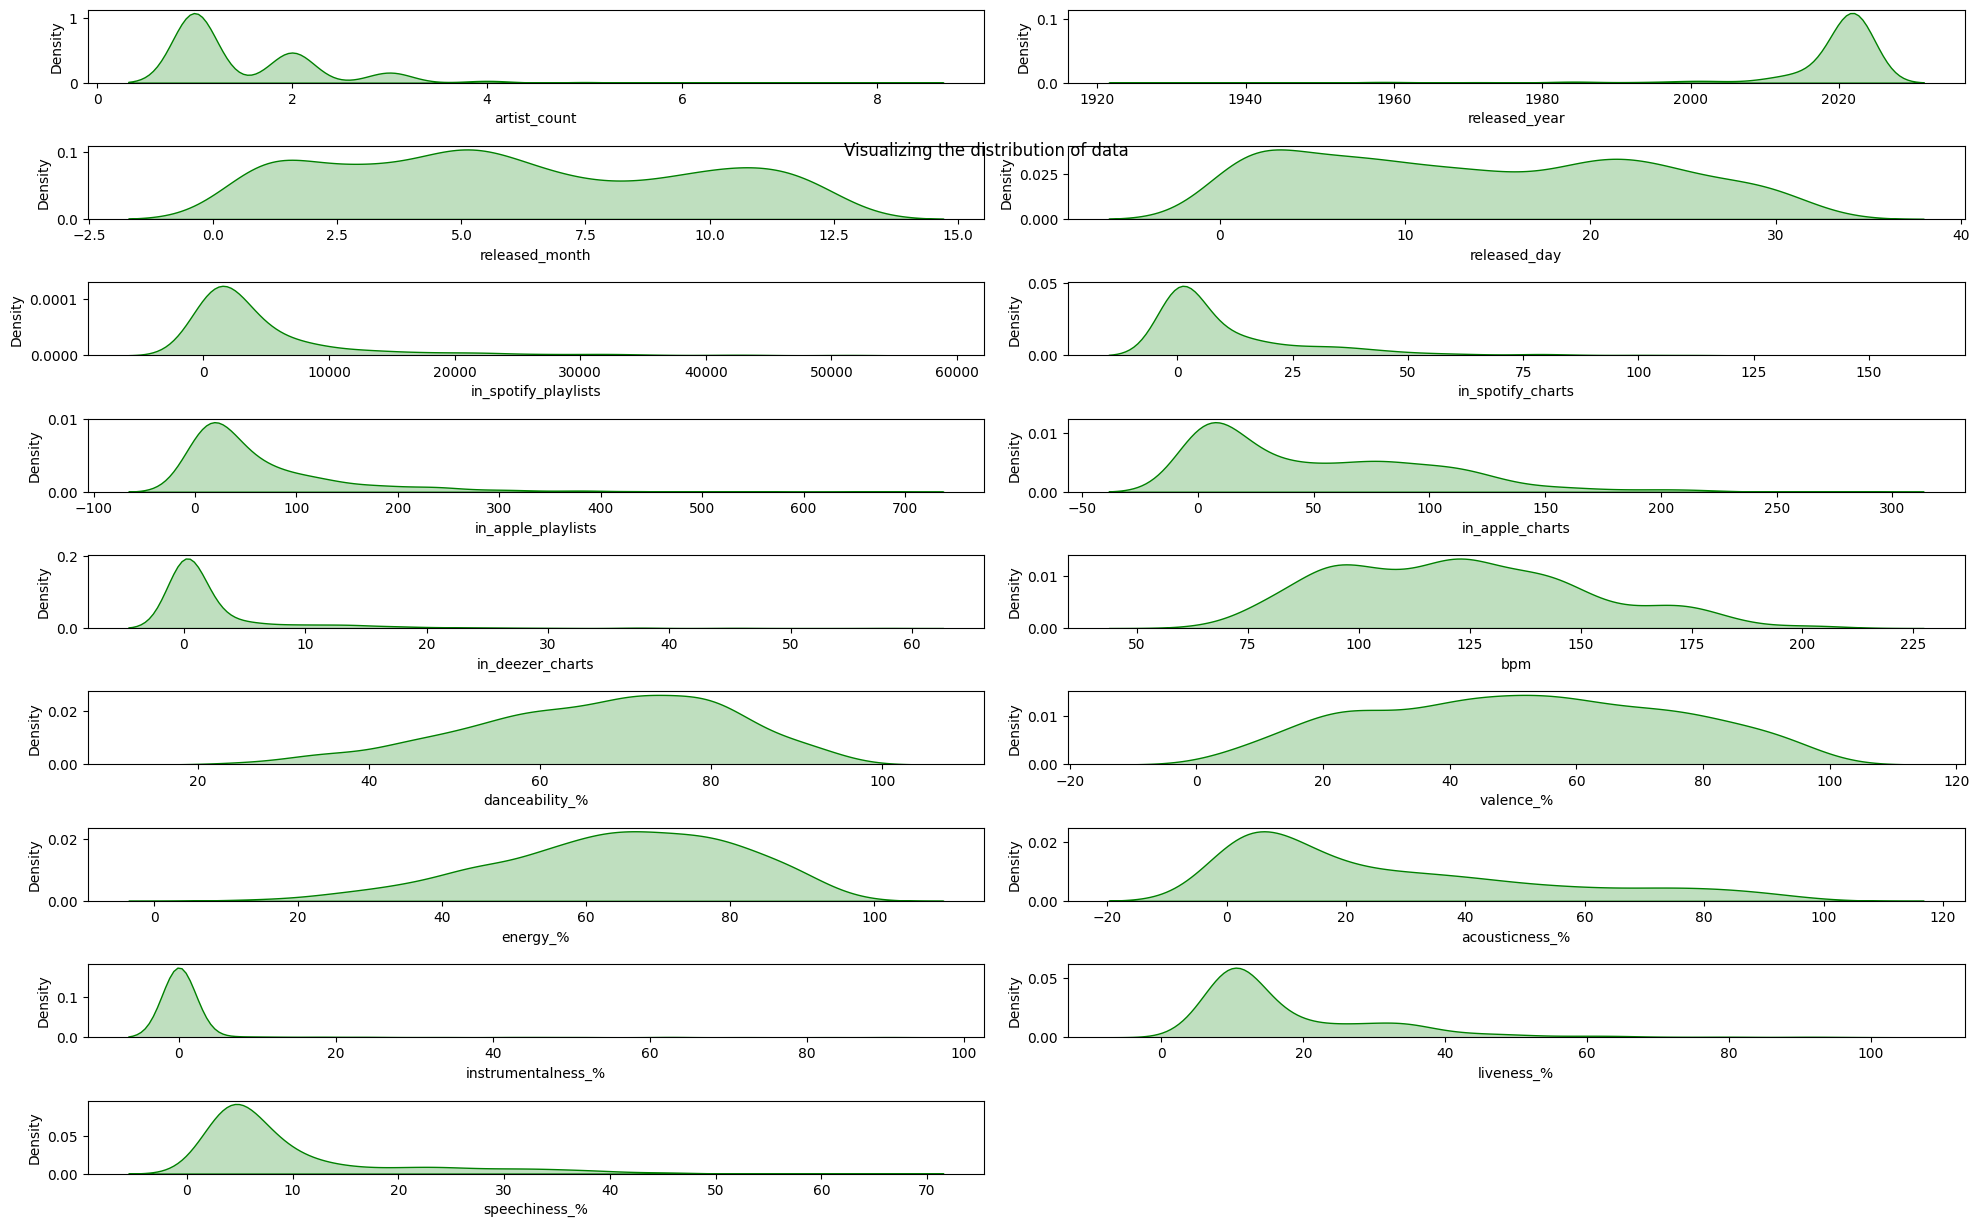

In [22]:
plt.figure(figsize=(20,90))
plt.suptitle("Visualizing the distribution of data")  
pltno=1
for i in numcol:
    if pltno<=226:
        plt.subplot(66,2,pltno)
        sns.kdeplot(df[i],shade=True,color='green')
    pltno=pltno+1
plt.tight_layout()

In [23]:
from scipy.stats import zscore

In [24]:
df.columns
df.skew(numeric_only=True)

artist_count            2.544032
released_year          -4.292118
released_month          0.184758
released_day            0.164102
in_spotify_playlists    2.929126
in_spotify_charts       2.580482
in_apple_playlists      2.473987
in_apple_charts         1.035249
in_deezer_charts        3.766095
bpm                     0.413246
danceability_%         -0.435878
valence_%               0.008224
energy_%               -0.446399
acousticness_%          0.952462
instrumentalness_%      7.124217
liveness_%              2.104280
speechiness_%           1.934668
dtype: float64

## Identifying the outliers

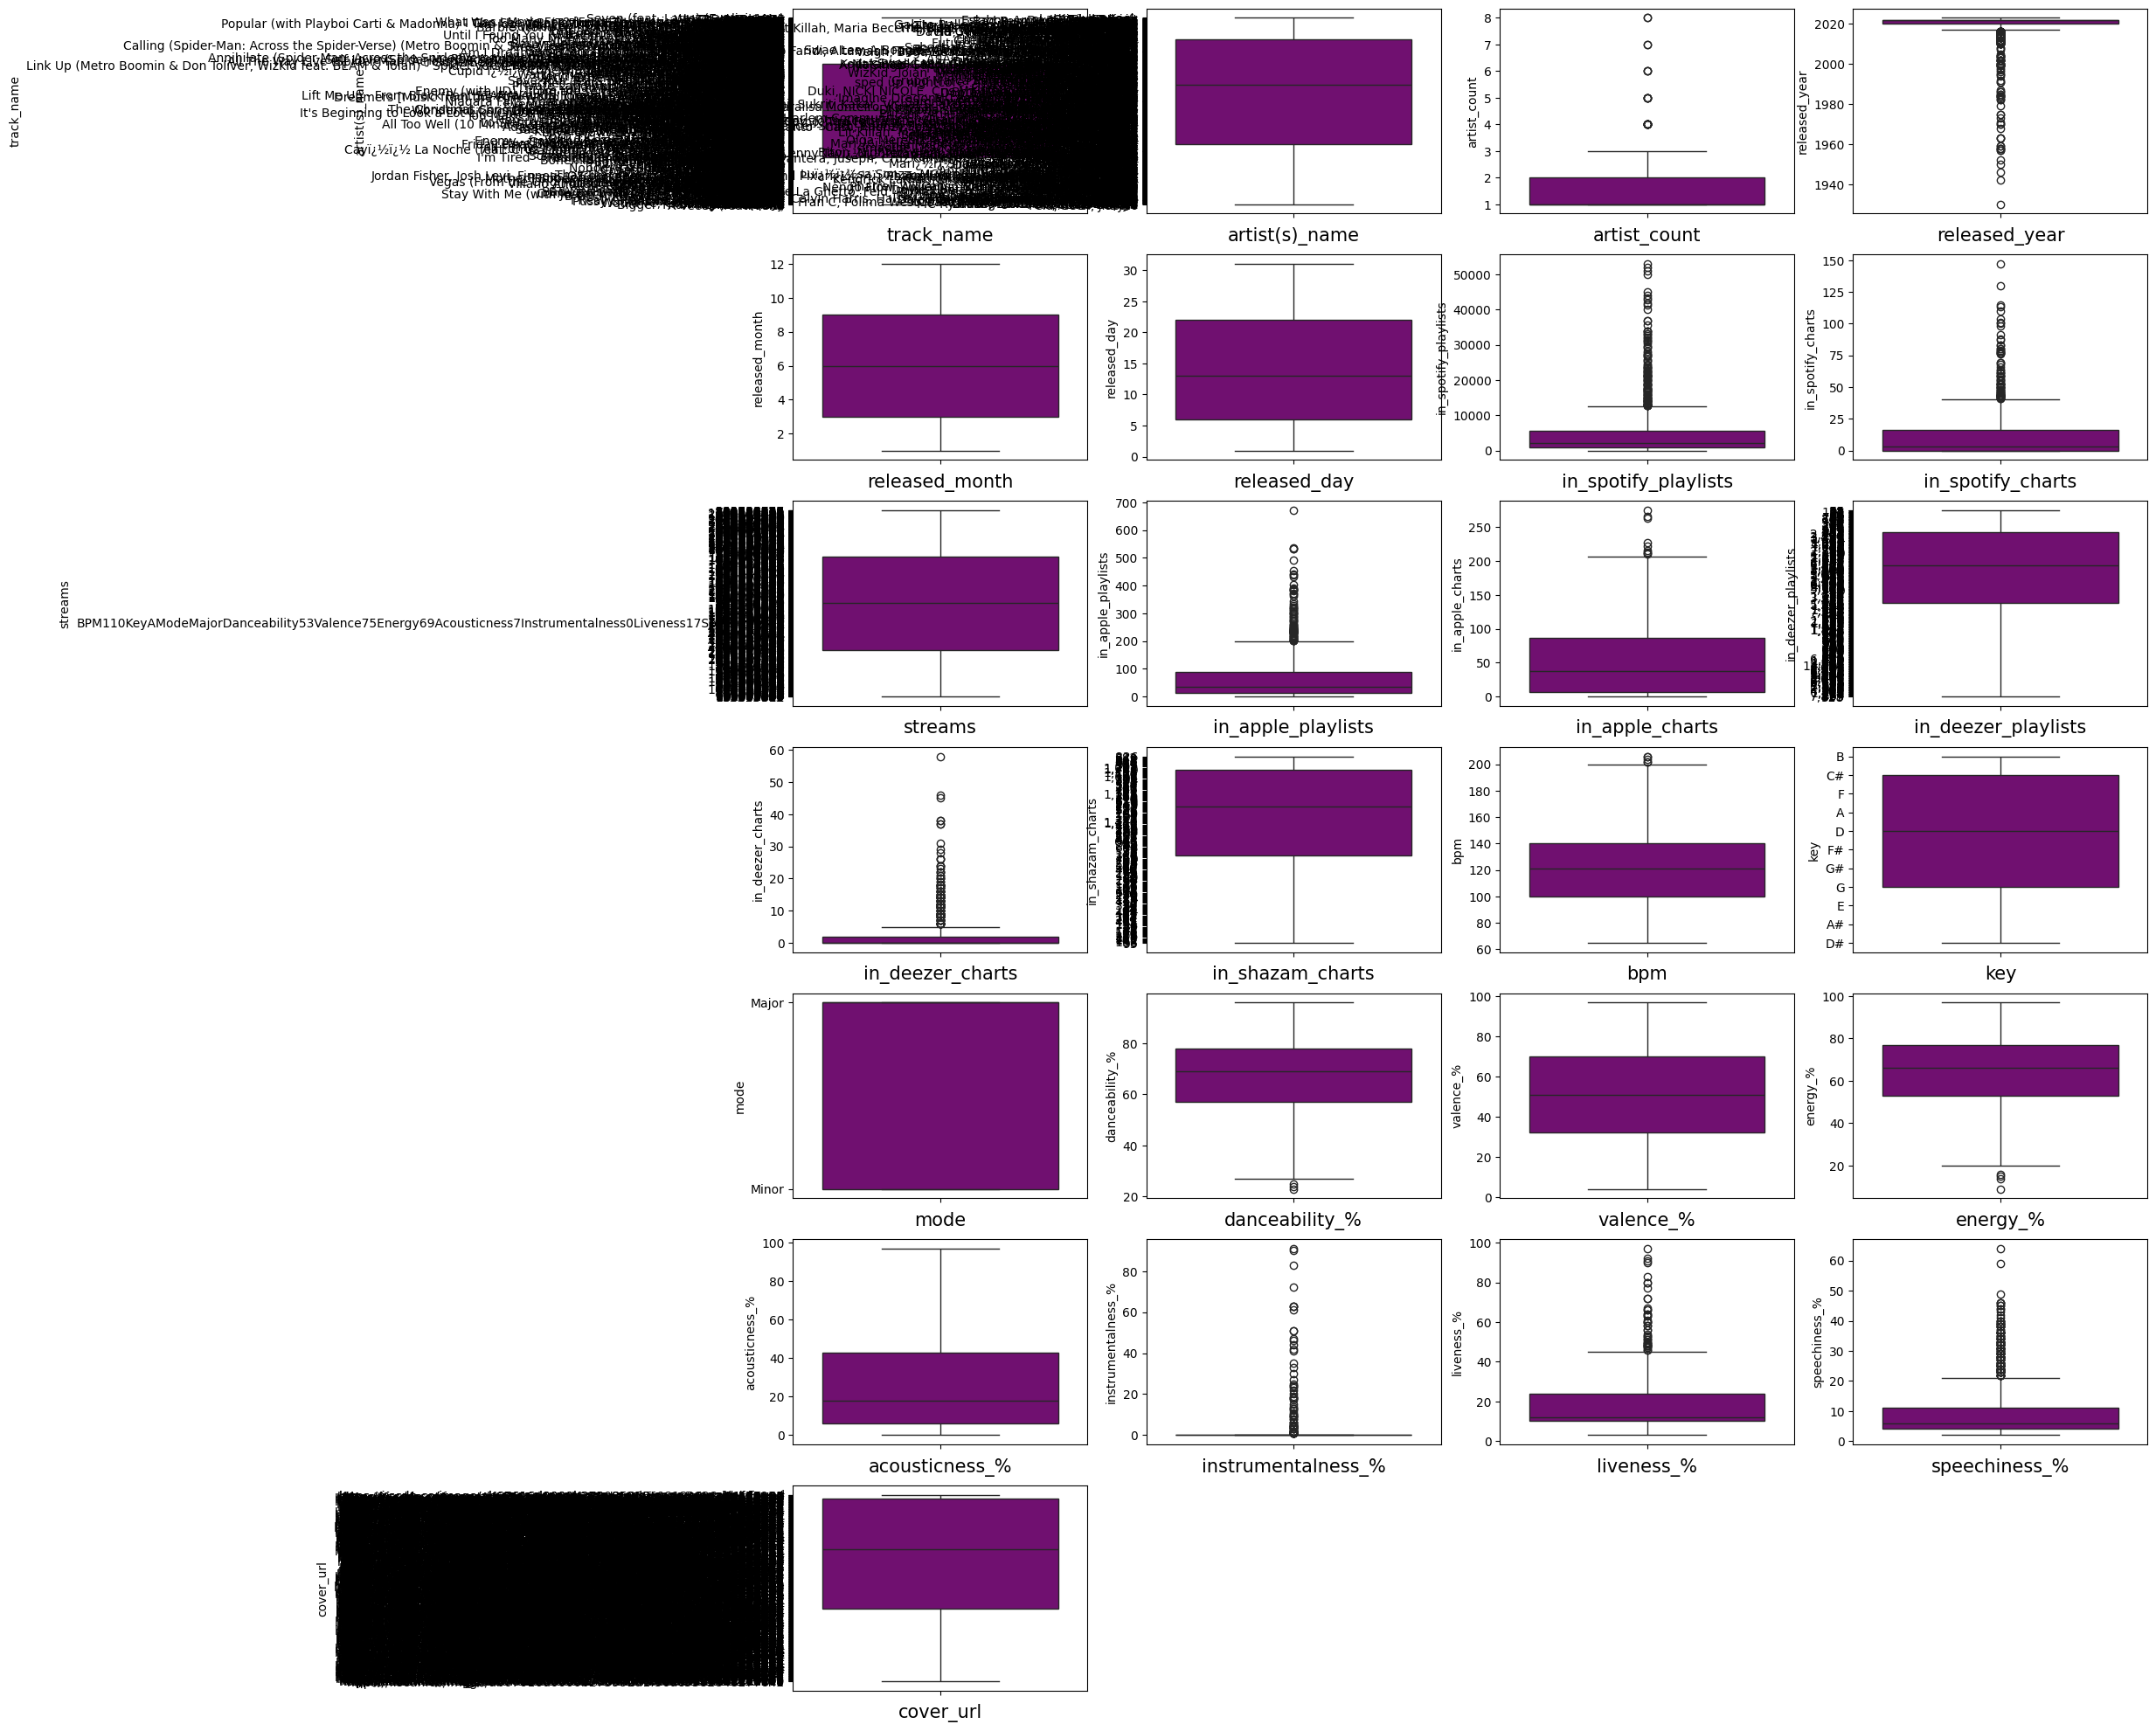

In [25]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=26:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color="purple")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

The outliers present in the following columns:
1. artist_count
2. released_year
3. in_spotify_playlists
4. in_spotify_charts
5. in_apple_playlists
6. in_apple_charts
7. in_deezer_charts
8. bpm 
9. danceability_%
10. energy_%
11. instrumentalness_%
12. liveness_% 
13. speechiness_%

# Removing outliers
Zscore method  -  Z score impliment on numerical data only

In [26]:
# Features containing outliers
features = df[['artist_count','released_year','in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts','in_deezer_charts','bpm','danceability_%','energy_%','instrumentalness_%','liveness_%','speechiness_%']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,artist_count,released_year,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,energy_%,instrumentalness_%,liveness_%,speechiness_%
0,0.497282,0.428590,0.588731,6.899341,0.287191,4.171462,1.215709,0.087708,0.891096,1.131729,0.188132,0.745256,0.618829
1,0.623072,0.428590,0.472052,1.839470,0.229318,1.464149,1.878792,1.089053,0.275624,0.587654,0.188132,0.599314,0.618829
2,0.623072,0.428590,0.481807,5.161607,0.303113,3.064823,1.878792,0.551280,1.092091,0.681854,0.188132,0.933082,0.416966
3,0.623072,0.068567,0.336718,4.497180,0.557754,3.064823,1.547251,1.692382,0.818548,0.466749,0.188132,0.526342,0.491420
4,0.623072,0.428590,0.261878,1.941690,0.187368,1.602478,2.044562,0.765237,0.134690,0.950371,7.307062,0.526342,0.416966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,0.623072,0.338585,0.538056,0.613800,0.078848,0.768891,0.276226,0.765237,0.476619,1.528193,0.188132,0.745256,0.719761
949,0.623072,0.338585,0.509298,0.613800,0.738600,1.025789,0.441997,1.549744,1.707562,2.434984,0.069161,0.453371,0.416966
950,0.497282,0.338585,0.586197,0.613800,0.761749,1.025789,0.441997,1.089053,0.891096,0.164485,0.188132,0.745256,0.416966
951,1.617635,0.338585,0.491562,0.613800,0.449235,0.511993,0.441997,0.910756,1.027867,0.769012,0.188132,0.453371,0.517897


Now we have removed the outliers.

In [27]:
# Creating new dataframe
new_df = df[(z<=3).all(axis=1)] 
new_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,https://i.scdn.co/image/ab67616d0000b273a00a81...
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,Not Found
11,Super Shy,NewJeans,1,2023,7,7,422,55,58255150,37,...,F,Minor,78,52,82,18,0,15,7,https://i.scdn.co/image/ab67616d0000b2733d98a0...
18,Classy 101,"Feid, Young Miko",2,2023,3,31,2610,40,335222234,43,...,B,Major,86,67,66,14,0,12,16,https://i.scdn.co/image/ab67616d0000b27329ebee...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [28]:
# Shape of original dataset
df.shape

(953, 25)

Before removing the outliers we had 953 rows and 25 columns in our dataset.

In [29]:
# Shape of new dataframe
new_df.shape

(779, 25)

After removing the outliers we have 779 rows and 25 columns.

In [30]:
# Checking the the data loss
data_loss = (953-779)/953*100
data_loss

18.25813221406086

Here we are losing more than 18% of data. Let's check the data loss using IQR method and then we will decide whether to remove outliers or not.

# 2. IQR (Inter Quantile Range) method

In [31]:
# Extracting only the numeric columns (Year and Value)
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the 1st and 3rd quartiles
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter out the outliers based on the IQR rule
df1 = df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

We have removed the outliers using IQR method.

In [32]:
df1.shape

(423, 25)

Using IQR method the dataframe has 423 rows and 25 columns.

In [33]:
# Let's check the dataloss
data_loss = (953-423)/953*100
data_loss

55.613850996852044

Using IQR method we are losing 55.61% of data.

By using both Zscore and IQR method we are losing more data, so I am not going to remove outliers since the outliers present in the data may have some strong relation with columns. If we try to remove the outliers, it will impact the other variables since it eliminates one complete row. That row may have other good test for other values. On this basis I am not going to remove the outliers in any of the columns and keeping my dataframe as it is.

<Axes: >

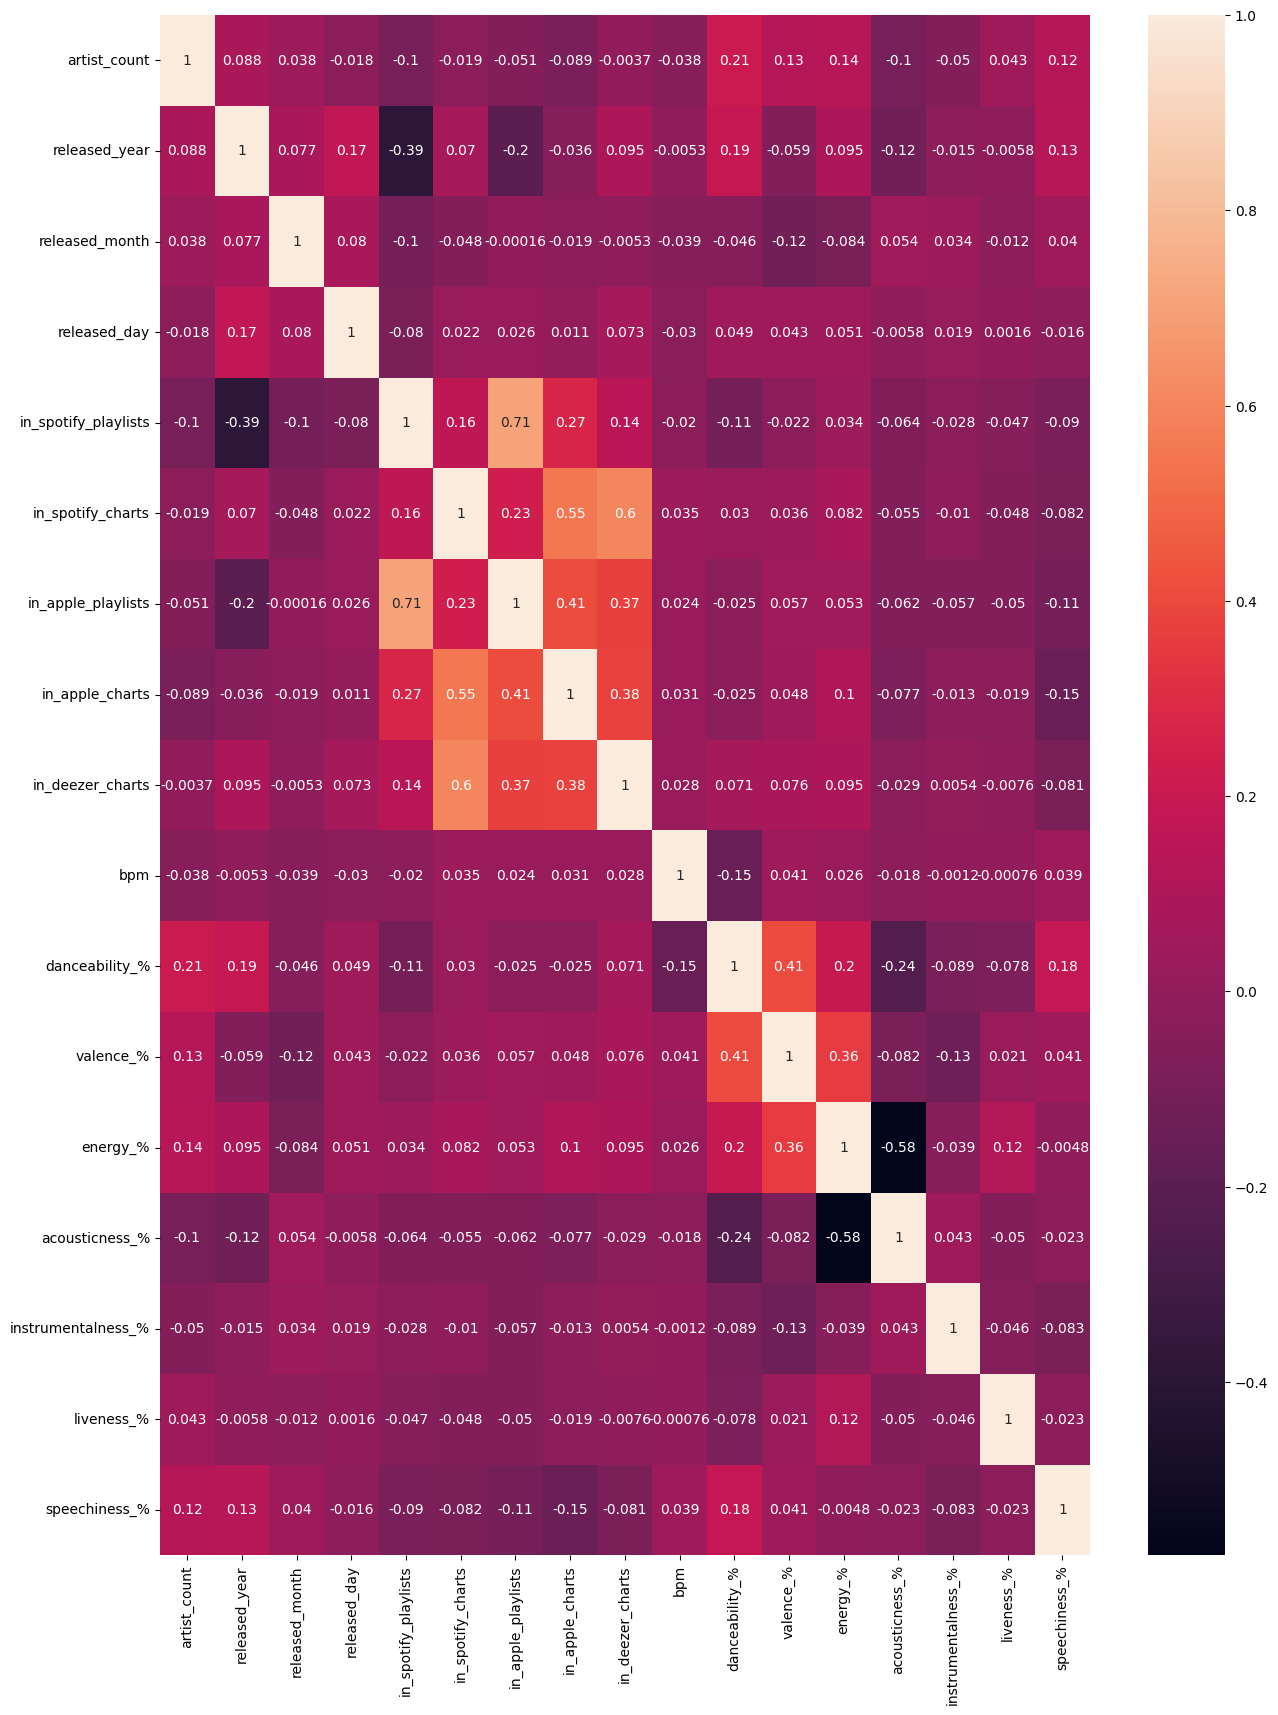

In [34]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Separating the features and label variables into x and y


In [35]:
x = df.drop("in_apple_charts", axis=1)
y = df["in_apple_charts"]

We have separated independent and variables and stored in x and y respectively.

In [36]:
# Dimension of x
x.shape

(953, 24)

In [37]:
# Dimension of y
y.shape

(953,)

## Checking for skewness

In [38]:

df.skew(numeric_only=True)

artist_count            2.544032
released_year          -4.292118
released_month          0.184758
released_day            0.164102
in_spotify_playlists    2.929126
in_spotify_charts       2.580482
in_apple_playlists      2.473987
in_apple_charts         1.035249
in_deezer_charts        3.766095
bpm                     0.413246
danceability_%         -0.435878
valence_%               0.008224
energy_%               -0.446399
acousticness_%          0.952462
instrumentalness_%      7.124217
liveness_%              2.104280
speechiness_%           1.934668
dtype: float64

## Removing skewness using yeo-johnson method

In [39]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['artist_count','released_year','released_month','released_day','in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts','in_deezer_charts','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [40]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1.100056,0.551258,0.376389,0.162058,-1.054671,1.876717,0.145805,2.137929,1.624067,0.189399,0.903176,1.532239,1.186642,0.506612,-0.316921,-1.031306,-0.785902
1,-0.781173,0.551258,-0.793450,0.970450,-0.312924,1.449218,0.230961,1.241963,1.684672,-1.132253,0.213318,0.438719,0.559939,-0.650259,-0.316921,-0.586700,-0.785902
2,-0.781173,0.551258,0.115663,1.507959,-0.353401,1.783916,0.778053,1.825062,1.684672,0.624926,-1.112936,-0.799177,-0.745453,-0.020123,-0.316921,1.202342,-0.059384
3,-0.781173,-0.036827,0.622532,0.970450,0.942381,1.739239,0.958772,1.825062,1.659115,1.557286,-0.871438,0.316673,0.425926,-0.350358,-0.316921,-0.406197,1.092291
4,-0.781173,0.551258,-0.162807,0.542277,0.254421,1.466349,0.683273,1.301439,1.695015,0.813616,-0.215205,-1.220208,0.973509,-0.172559,3.185111,-0.406197,-0.059384


In [41]:

df.skew(numeric_only=True)

artist_count            0.547613
released_year          -3.141208
released_month         -0.130720
released_day           -0.206279
in_spotify_playlists    0.000981
in_spotify_charts       0.156744
in_apple_playlists     -0.021588
in_apple_charts        -0.200120
in_deezer_charts        0.611107
bpm                    -0.004734
danceability_%         -0.099936
valence_%              -0.149749
energy_%               -0.114406
acousticness_%         -0.106378
instrumentalness_%      2.843714
liveness_%              0.042806
speechiness_%           0.223120
dtype: float64

I have used all the methods like cube root, square root, log and log1p transformations and yeo-johnson methods but the skewness is not reducing in released_year, in_apple_charts and instrumentalness_%. This is because these columns may have some extreme test level. So keeping the skewness in those columns as it is and moving further. 

KeyError: 'in_apple_charts'

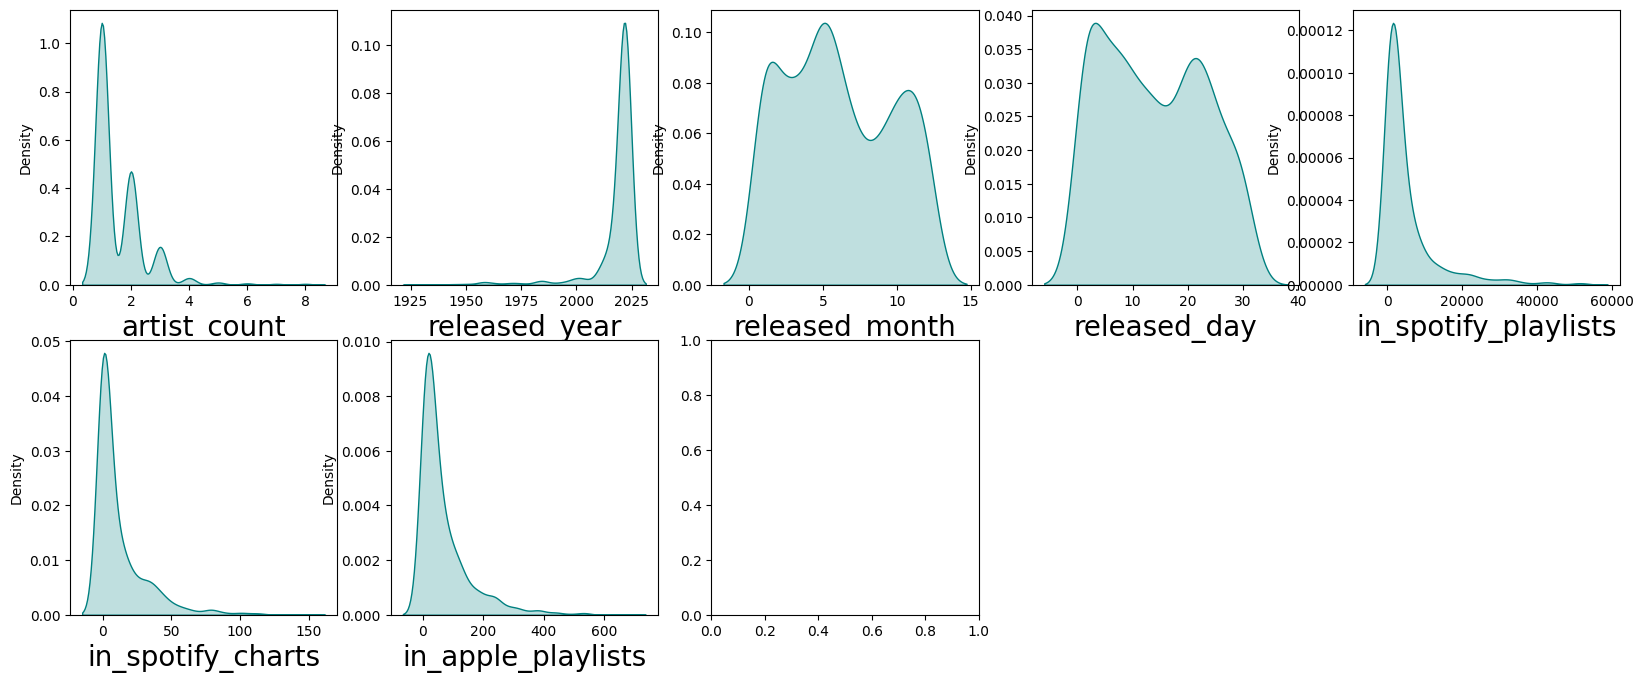

In [42]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skew]:
    if plotnumber<=26:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(x[column],color='teal',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

After removing the skewness the data looks almost normal compared to old data. The skewness has been removed in all the columns and the skewness is reduced in the columns released_year, in_apple_charts and instrumentalness_%.

After removing the skewness. We have done all the preprocessing and data cleaning, now our dataset is ready for building the machine learning models. 

<Axes: >

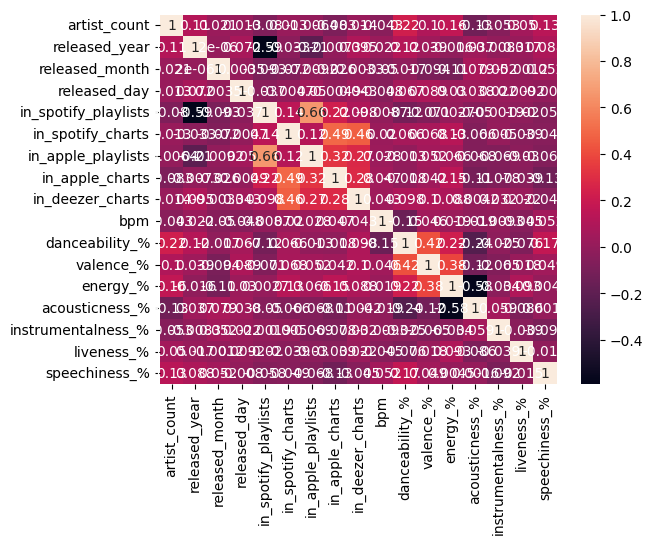

In [43]:
sns.heatmap(new_df.corr(numeric_only=True),annot=True)

In [44]:
catcol=df.select_dtypes('object').columns

In [45]:
skew1=['in_spotify_charts','in_deezer_charts']
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer(method='yeo-johnson')

In [46]:
new_df[skew1]=PT.fit_transform(new_df[skew1])

In [47]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
new_df[catcol]=OE.fit_transform(new_df[catcol])

In [48]:
x=new_df.iloc[:,:-1]

In [49]:
y=new_df.iloc[:,-1]

In [50]:
x

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
1,322.0,329.0,1,2023,3,23,1474,1.526465,102.0,48,...,92,3.0,0.0,71,61,74,7,0,10,4
7,126.0,387.0,1,2023,7,7,714,1.479178,599.0,25,...,100,7.0,0.0,67,26,71,37,0,11,4
9,330.0,373.0,2,2023,3,17,2953,1.489136,580.0,49,...,170,4.0,1.0,81,56,48,21,0,8,33
11,621.0,344.0,1,2023,7,7,422,1.583726,600.0,37,...,150,7.0,1.0,78,52,82,18,0,15,7
18,123.0,154.0,2,2023,3,31,2610,1.447591,429.0,43,...,100,2.0,0.0,86,67,66,14,0,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,426.0,426.0,1,2022,11,3,953,-1.039542,745.0,61,...,144,0.0,0.0,60,24,39,57,0,8,3
949,80.0,460.0,1,2022,10,21,1180,-1.039542,67.0,4,...,166,8.0,0.0,42,7,24,83,1,12,6
950,13.0,152.0,2,2022,11,3,573,-1.039542,686.0,2,...,92,3.0,0.0,80,81,67,4,0,8,6
951,191.0,153.0,3,2022,10,20,1320,-1.039542,103.0,29,...,97,3.0,0.0,82,67,77,8,0,12,5


In [51]:
y

1       14.0
7      270.0
9        0.0
11     111.0
18      72.0
       ...  
948     26.0
949    373.0
950      0.0
951      0.0
952    254.0
Name: cover_url, Length: 779, dtype: float64

## Creating train test split

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

Here we have created new test train split.

# Regression Algorithms

In [53]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

R2_Score: 0.032312276316312505
MAE: 110.54384615384616
MSE: 17411.803076068376
RMSE: 131.95379144256665


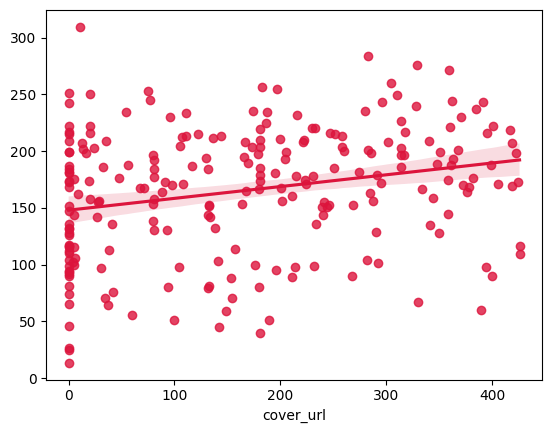

In [54]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(xtrain,ytrain)

# prediction
predRFR=RFR.predict(xtest)
rf=r2_score(ytest,predRFR)
print('R2_Score:',rf)
print('MAE:',metrics.mean_absolute_error(ytest, predRFR))
print('MSE:',metrics.mean_squared_error(ytest, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predRFR)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predRFR,color="crimson")
plt.show()

We have created Random Forest Regressor and checked the evaluation metrics. The predicted R2 score for Random Forest Regressor is 0.036%. 

## Decision Tree Regressor

R2_Score: -0.7909225646734044
MAE: 142.97435897435898
MSE: 32224.4358974359
RMSE: 179.51165950276294


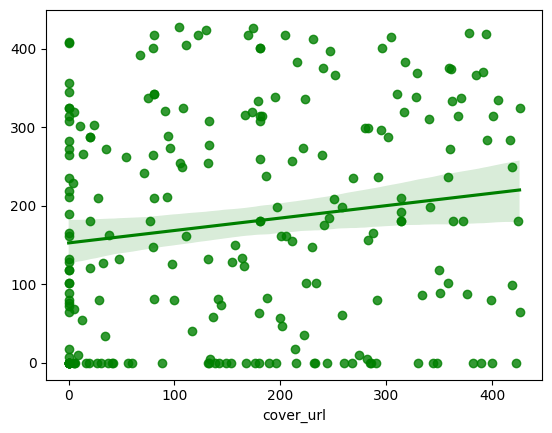

In [55]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(xtrain,ytrain)

# prediction
predDTR=DTR.predict(xtest)
dt=r2_score(ytest,predDTR)
print('R2_Score:',dt)
print('MAE:',metrics.mean_absolute_error(ytest, predDTR))
print('MSE:',metrics.mean_squared_error(ytest, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predDTR)))

# Visualizing the predicteed values
sns.regplot(x=ytest,y=predDTR,color="green")
plt.show()

We have created Decision Tree Regressor and checked the evaluation metrics. The predicted R2 score for Decision Tree Regressor is -0.78%.

## GradientBoosting Regressor

R2_Score: 0.03848967558141192
MAE: 109.12964763552077
MSE: 17300.651867994027
RMSE: 131.53194238660822


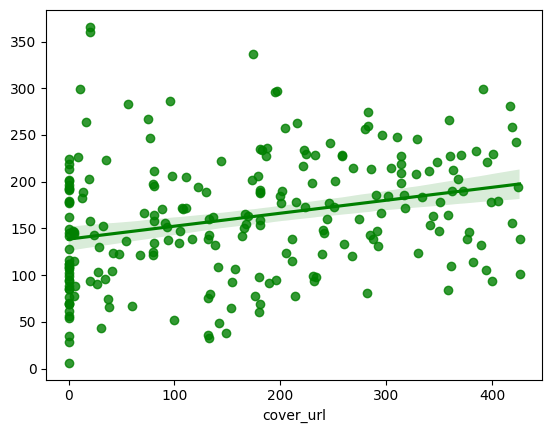

In [56]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(xtrain,ytrain)

# prediction
predGB=GB.predict(xtest)
gbr=r2_score(ytest,predGB)
print('R2_Score:',gbr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predGB))
print('MSE:',metrics.mean_squared_error(ytest, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predGB)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predGB,color="green")
plt.show()

We have created Gradient Boosting Regressor and checked the evaluation metrics. The predicted R2 score for Gradient Boosting Regressor is 0.03%.

## BaggingRegressor

R2_Score: -0.10524024502054696
MAE: 117.91410256410256
MSE: 19886.81371794872
RMSE: 141.0206145141508


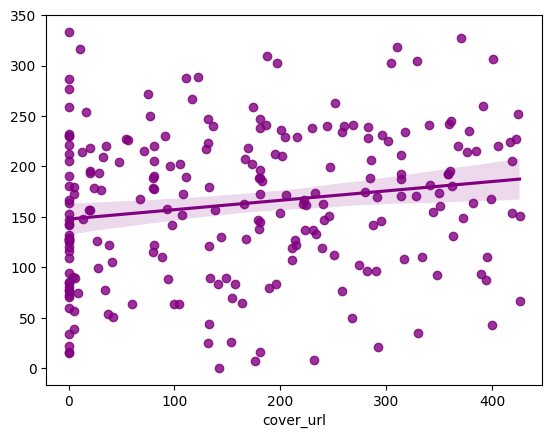

In [57]:
# Checking R2 score for BaggingRegressor

BR=BaggingRegressor()
BR.fit(xtrain,ytrain)

# prediction
predBR=BR.predict(xtest)
bgr=r2_score(ytest,predBR)
print('R2_Score:',bgr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predBR))
print('MSE:',metrics.mean_squared_error(ytest, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predBR)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predBR,color="purple")
plt.show()

We have created Bagging Regressor and checked the evaluation metrics. The predicted R2 score for Bagging Regressor is -0.08%.

## XGB Regressor

R2_Score: -0.13801871323653936
MAE: 114.75703569558951
MSE: 20476.60339879682
RMSE: 143.09648283167834


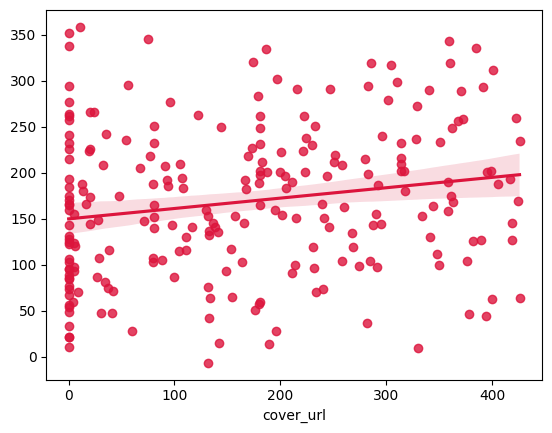

In [58]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB=xgb()
XGB.fit(xtrain,ytrain)

# prediction
predXGB=XGB.predict(xtest)
xgb1=r2_score(ytest,predXGB)
print('R2_Score:',xgb1)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predXGB))
print('MSE:',metrics.mean_squared_error(ytest, predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predXGB)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predXGB,color="crimson")
plt.show()

We have created XGB Regressor and checked the evaluation metrics. The predicted R2 score for XGB Regressor is -0.13%.

# ExtraTrees Regressor

R2_Score: 0.07830740419606153
MAE: 108.08491452991451
MSE: 16584.203335470083
RMSE: 128.77966972884377


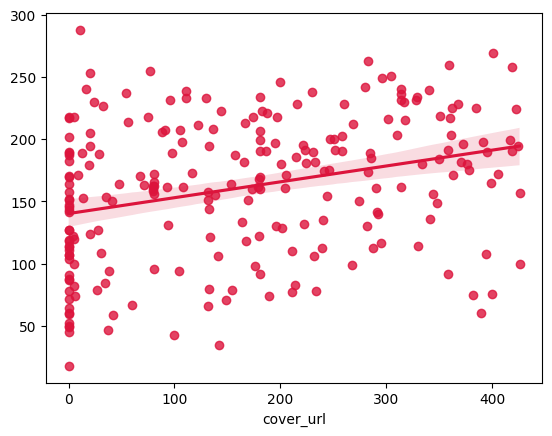

In [59]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(xtrain,ytrain)

# prediction
predXT=XT.predict(xtest)
etr=r2_score(ytest,predXT)
print('R2_Score:',etr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predXT))
print('MSE:',metrics.mean_squared_error(ytest, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predXT)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predXT,color="crimson")
plt.show()

We have created Extra Trees Regressor and checked the evaluation metrics. The predicted R2 score for Extra Trees Regressor is 0.05%.

# Checking the cross validation score

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# Checking cv score for Random Forest Regressor
rf_cv=cross_val_score(RFR,x,y,cv=5).mean()
rf_cv

np.float64(0.06760437111657577)

In [62]:
# Checking cv score for Decision Tree Regressor
dt_cv=cross_val_score(DTR,x,y,cv=5).mean()
dt_cv

np.float64(-0.7458740391516254)

In [63]:
# Checking cv score for Gradient Boosting Regressor
gb_cv=cross_val_score(GB,x,y,cv=5).mean()
gb_cv

np.float64(0.031051490143369186)

In [64]:
# Checking cv score for Bagging Regressor
br_cv=cross_val_score(BR,x,y,cv=5).mean()
br_cv

np.float64(-0.0034288093129515307)

In [65]:
# Checking cv score for XGBRegressor
xgb_cv=cross_val_score(XGB,x,y,cv=5).mean()
xgb_cv

np.float64(-0.14527376548494902)

In [66]:
# Checking cv score for ExtraTreesRegressor
et_cv=cross_val_score(XT,x,y,cv=5).mean()
et_cv

np.float64(0.07702842033720085)

In [67]:
regressor=['Random Forest Regressor','Decision Tree Regressor','Gradient Boosting Regressor','Bagging Regressor','XGB Regressor','Extra Tree Regressor']

In [68]:
accuracyscore=[rf,dt,gbr,bgr,xgb1,etr]

In [69]:
crossval=[rf_cv,dt_cv,gb_cv,br_cv,xgb_cv,et_cv]

In [70]:
models=pd.DataFrame({})
models['Regressor']=regressor
models['Accuracy_score']=accuracyscore
models['crossval']=crossval

In [71]:
models

,Regressor,Accuracy_score,crossval
0,Random Forest Regressor,0.032312,0.067604
1,Decision Tree Regressor,-0.790923,-0.745874
2,Gradient Boosting Regressor,0.038490,0.031051
3,Bagging Regressor,-0.105240,-0.003429
4,XGB Regressor,-0.138019,-0.145274
5,Extra Tree Regressor,0.078307,0.077028


Above are the cross validation score for the models that we have used.

We will perform Hyper parameter tuning on the best model.

# Hyper parameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:

parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

In [74]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

Running GridSearchCV for XGB Regressor.

R2_Score -0.13821234594202014
MAE 114.76755970359868
MSE 20480.087471658757
RMSE 143.1086561730588


<Axes: xlabel='cover_url'>

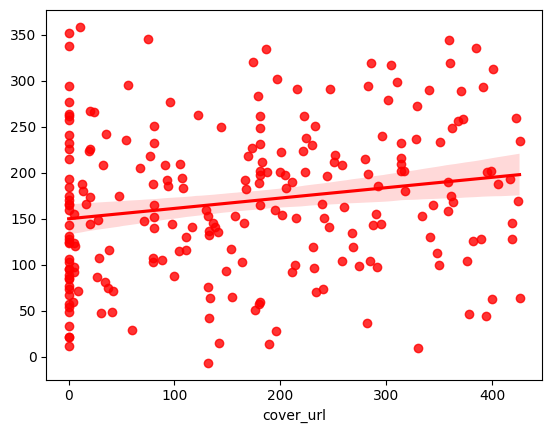

In [75]:
Final_model1=xgb(max_depth=None,min_samples_split=2,n_estimators=300)
Final_model1.fit(xtrain,ytrain)
pred=Final_model1.predict(xtest)
print('R2_Score',r2_score(ytest,pred))
print('MAE',metrics.mean_absolute_error(ytest,pred))
print('MSE',metrics.mean_squared_error(ytest,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(ytest,pred)))
sns.regplot(x=ytest,y=pred,color='r')